In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salaries.csv")

## Matrice de corrélation complète

In [10]:
# Pearson
corr = df.corr() 
print("Matrice de corrélation :")
print(corr.round(3))

Matrice de corrélation :
            Salaire  Education  Minorite  Genre  Anciennete  Cadre
Salaire       1.000      0.661    -0.177 -0.450      -0.089  0.804
Education     0.661      1.000    -0.133 -0.356      -0.247  0.605
Minorite     -0.177     -0.133     1.000 -0.076       0.149 -0.193
Genre        -0.450     -0.356    -0.076  1.000      -0.170 -0.314
Anciennete   -0.089     -0.247     0.149 -0.170       1.000 -0.080
Cadre         0.804      0.605    -0.193 -0.314      -0.080  1.000


## Corrélations de chaque variable avec la variable cible Cadre

In [4]:
print(corr["Cadre"].sort_values(ascending=False).round(3))

Cadre         1.000
Salaire       0.804
Education     0.605
Anciennete   -0.080
Minorite     -0.193
Genre        -0.314
Name: Cadre, dtype: float64


# Interprétation :

#### Salaire (r ≈ 0,80)

Très forte corrélation positive : les employés cadres ont des salaires beaucoup plus élevés.

Alors on peut dire que le salaire est un excellent indicateur du statut de cadre.

#### Education (r ≈ 0,61)

Forte corrélation positive : plus les années d’étude sont élevées, plus la probabilité d’être cadre augmente.

Le niveau d’études est aussi un bon prédicteur du fait d’être cadre.

#### Genre (r ≈ −0,31, 1 = femme)
Corrélation négative : quand la variable Genre augmente (on passe de 0 = homme à 1 = femme), la probabilité d’être cadre diminue.

Les femmes sont moins souvent cadres que les hommes.

#### Minorite (r ≈ −0,19, 1 = minorité)

Corrélation négative modérée : les employés appartenant à une minorité sont un peu moins souvent cadres.

Les minorités sont sous-représentées parmi les cadres.

#### Anciennete (r ≈ −0,08)

Corrélation quasi nulle : l’ancienneté n’a pratiquement pas de relation linéaire avec le fait d’être cadre

## Corrélations uniquement entre les variables explicatives

In [6]:
cols_X = ["Salaire", "Education", "Anciennete", "Genre", "Minorite"]
print(df[cols_X].corr().round(3))

            Salaire  Education  Anciennete  Genre  Minorite
Salaire       1.000      0.661      -0.089 -0.450    -0.177
Education     0.661      1.000      -0.247 -0.356    -0.133
Anciennete   -0.089     -0.247       1.000 -0.170     0.149
Genre        -0.450     -0.356      -0.170  1.000    -0.076
Minorite     -0.177     -0.133       0.149 -0.076     1.000


# Interprétation :

Le salaire est fortement corrélé au niveau d’éducation (r ≈ 0,66)

On observe également une corrélation négative entre le salaire et le fait d’être une femme (r ≈ −0,45) ainsi qu’entre l’éducation et le fait d’être une femme (r ≈ −0,36).

L’ancienneté présente dans l’ensemble de faibles corrélations avec les autres variables. 

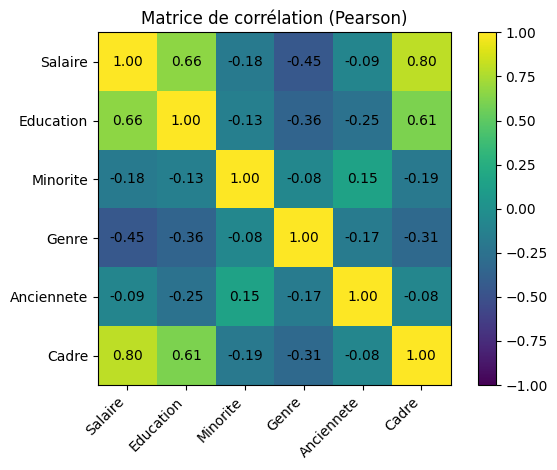

In [9]:
fig, ax = plt.subplots()
im = ax.imshow(corr, vmin=-1, vmax=1)

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticks(range(len(corr.index)))
ax.set_yticklabels(corr.index)
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                ha="center", va="center")

fig.colorbar(im, ax=ax)
plt.title("Matrice de corrélation (Pearson)")
plt.tight_layout()
plt.show()